In [1]:
import sys
if ".." not in sys.path:
    sys.path.insert(0, "..")
    
from src.utils import *
from src.plots import *
import torch.optim as optim

In [2]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
embs = torch.load('../embeddings/audio/raw_wav2vec2.pt')

In [3]:
train_loader, test_loader = train_test_dataloader(embs)

In [4]:
model = MLP(input_dim = 1024, hidden_dims = [1024], output_dim = 6, dropout = 0.3).to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.0001)
num_epochs = 50

PARAMS = {'model': model,
          'criterion': criterion,
          'optimizer': optimizer,
          'num_epochs': num_epochs,
          'train_loader': train_loader,
          'test_loader': test_loader,
          'device': DEVICE,
          'patience': 10}

/home/mweuro/venvy/best_venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
results = train_model(**PARAMS)

Epoch 5/50
Train Loss: 1.3570,                    Train Accuracy: 0.4773,                    Train Precision: 0.4689,                    Train Recall 0.4773.
Val Loss: 1.3534,                    Val Accuracy: 0.4668,                    Val Precision: 0.4615,                    Val Recall: 0.4668.
--------------------------------------------------


Epoch 10/50
Train Loss: 1.2214,                    Train Accuracy: 0.5284,                    Train Precision: 0.5209,                    Train Recall 0.5284.
Val Loss: 1.2488,                    Val Accuracy: 0.5077,                    Val Precision: 0.5101,                    Val Recall: 0.5077.
--------------------------------------------------


Epoch 15/50
Train Loss: 1.1583,                    Train Accuracy: 0.5610,                    Train Precision: 0.5550,                    Train Recall 0.5610.
Val Loss: 1.1955,                    Val Accuracy: 0.5198,                    Val Precision: 0.5219,                    Val Recall: 0.5198.
--------------------------------------------------


Epoch 20/50
Train Loss: 1.1004,                    Train Accuracy: 0.5837,                    Train Precision: 0.5786,                    Train Recall 0.5837.
Val Loss: 1.1601,                    Val Accuracy: 0.5494,                    Val Precision: 0.5712,                    Val Recall: 0.5494.
--------------------------------------------------


Epoch 25/50
Train Loss: 1.0573,                    Train Accuracy: 0.6008,                    Train Precision: 0.5968,                    Train Recall 0.6008.
Val Loss: 1.1118,                    Val Accuracy: 0.5648,                    Val Precision: 0.5586,                    Val Recall: 0.5648.
--------------------------------------------------


Epoch 30/50
Train Loss: 1.0320,                    Train Accuracy: 0.6141,                    Train Precision: 0.6101,                    Train Recall 0.6141.
Val Loss: 1.1402,                    Val Accuracy: 0.5574,                    Val Precision: 0.5894,                    Val Recall: 0.5574.
--------------------------------------------------


Epoch 35/50
Train Loss: 0.9901,                    Train Accuracy: 0.6346,                    Train Precision: 0.6318,                    Train Recall 0.6346.
Val Loss: 1.0820,                    Val Accuracy: 0.5863,                    Val Precision: 0.6029,                    Val Recall: 0.5863.
--------------------------------------------------


Epoch 40/50
Train Loss: 0.9630,                    Train Accuracy: 0.6378,                    Train Precision: 0.6351,                    Train Recall 0.6378.
Val Loss: 1.0458,                    Val Accuracy: 0.6011,                    Val Precision: 0.6026,                    Val Recall: 0.6011.
--------------------------------------------------


Epoch 45/50
Train Loss: 0.9397,                    Train Accuracy: 0.6482,                    Train Precision: 0.6456,                    Train Recall 0.6482.
Val Loss: 1.0567,                    Val Accuracy: 0.6017,                    Val Precision: 0.6199,                    Val Recall: 0.6017.
--------------------------------------------------


Epoch 50/50
Train Loss: 0.9201,                    Train Accuracy: 0.6588,                    Train Precision: 0.6567,                    Train Recall 0.6588.
Val Loss: 1.0324,                    Val Accuracy: 0.6165,                    Val Precision: 0.6190,                    Val Recall: 0.6165.
--------------------------------------------------
BEST EPOCH: 45.00          BEST ACCURACY: 0.62          BEST PRECISION: 0.62          BEST RECALL: 0.62


In [6]:
epochs, train_losses, val_losses, train_accs, val_accs, train_precs, val_precs, train_recs, val_recs, best_epoch, cm = results

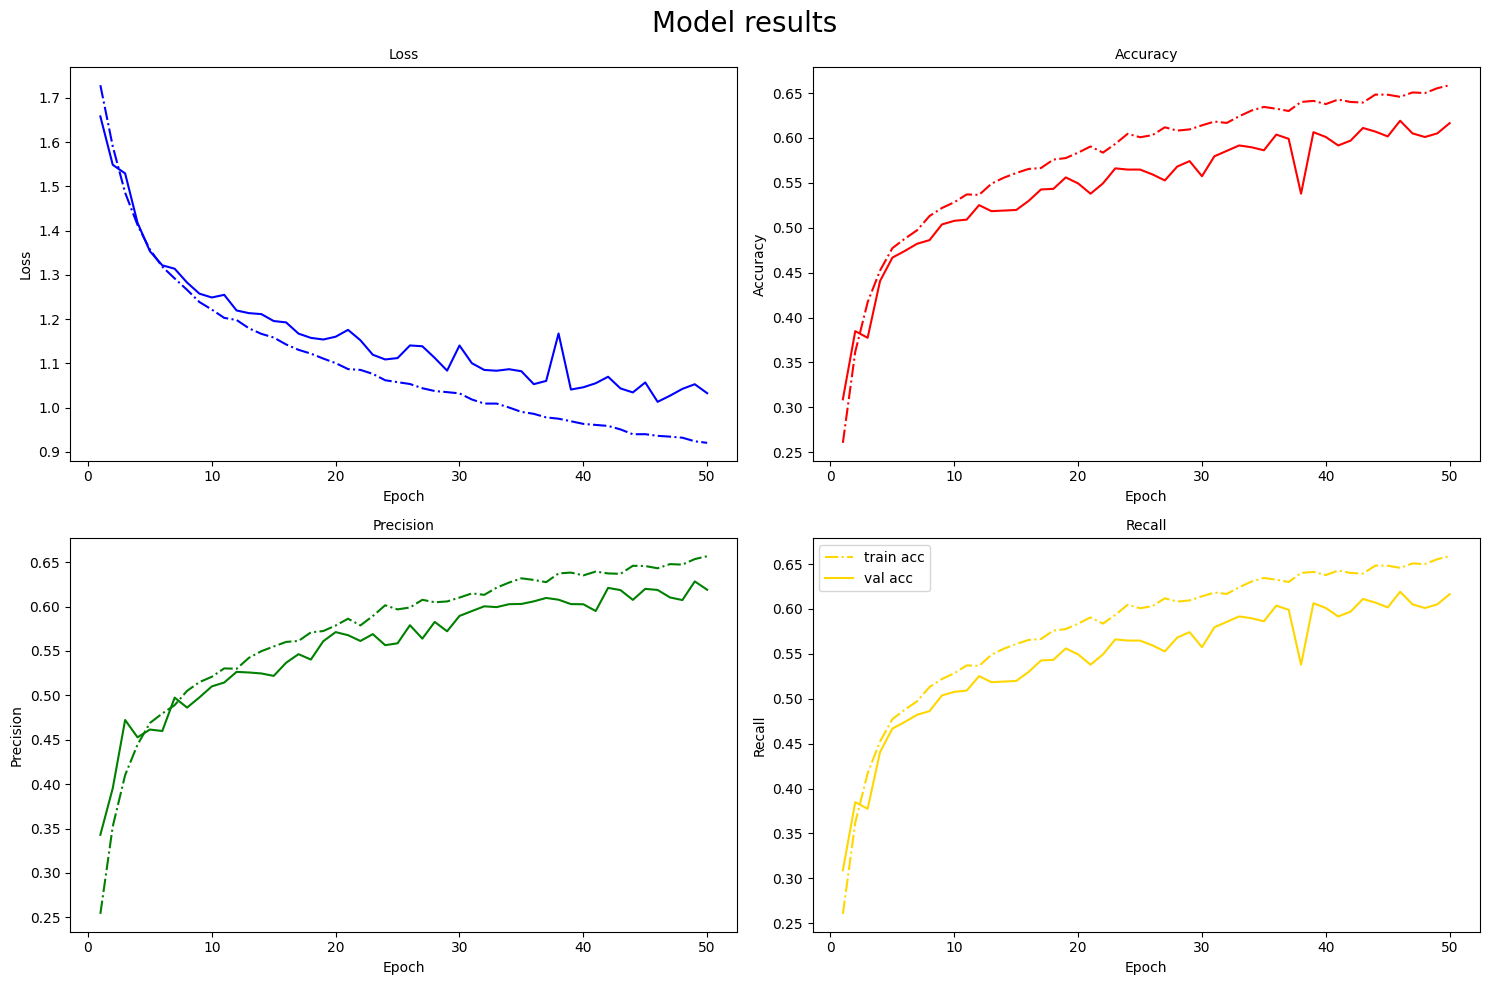

In [7]:
plot_metrics(train_losses, val_losses, train_accs, val_accs, train_precs, val_precs, train_recs, val_recs)

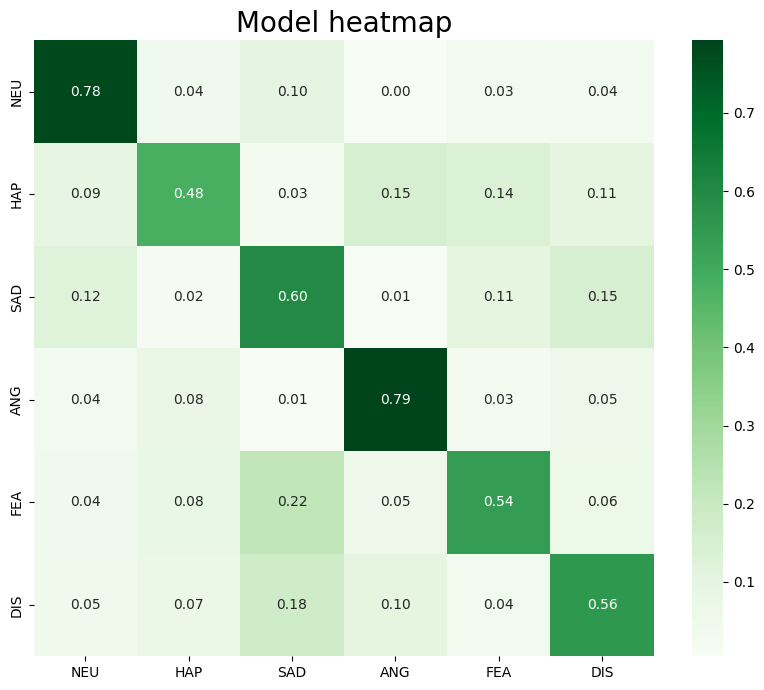

In [8]:
plot_confusion_matrix(cm)